# Ungraded Lab: Training a binary classifier with the Sarcasm Dataset

In [30]:
#import paskages
import numpy as np
import matplotlib.pyplot as plt


import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
#Load Data 
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [31]:
sentences = []
labels = []

In [32]:
# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [33]:
training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16

In [34]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Preprocessing the train and test sets


In [35]:
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [36]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [37]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [38]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [39]:
# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

### Build and Compile the Model

In [40]:
# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array:\n {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer:\n {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array:
 [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer:
 [[4 2]]


In [41]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [42]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Train the Model

In [43]:
history = model.fit(training_padded, training_labels, epochs=30 , validation_data=(testing_padded, testing_labels), verbose=2)


Epoch 1/30
625/625 - 2s - loss: 0.5447 - accuracy: 0.7140 - val_loss: 0.3885 - val_accuracy: 0.8395 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3043 - accuracy: 0.8773 - val_loss: 0.3444 - val_accuracy: 0.8514 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2268 - accuracy: 0.9115 - val_loss: 0.3493 - val_accuracy: 0.8544 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.1830 - accuracy: 0.9301 - val_loss: 0.3697 - val_accuracy: 0.8501 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.1516 - accuracy: 0.9439 - val_loss: 0.4020 - val_accuracy: 0.8487 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1271 - accuracy: 0.9556 - val_loss: 0.4339 - val_accuracy: 0.8463 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1093 - accuracy: 0.9616 - val_loss: 0.4735 - val_accuracy: 0.8435 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.0945 - accuracy: 0.9683 - val_loss: 0.5264 - val_accuracy: 0.8344 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

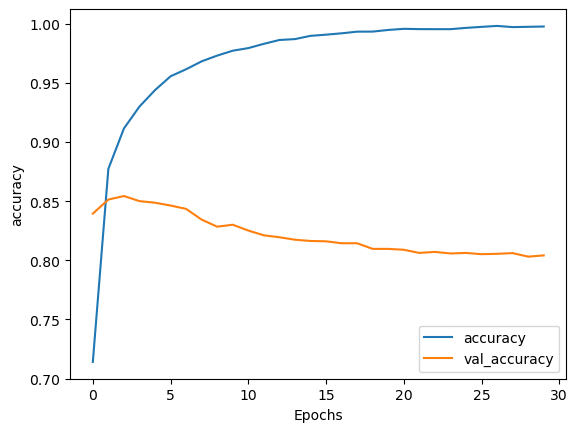

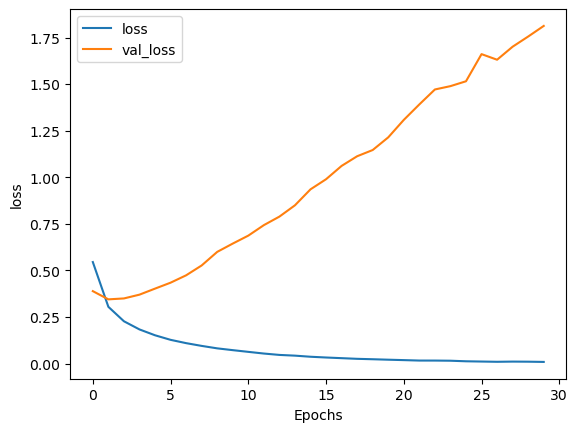

In [45]:
def plot_graphs(history, st):
    plt.plot(history.history[st])
    plt.plot(history.history['val_'+st])
    plt.xlabel("Epochs")
    plt.ylabel(st)
    plt.legend([st, 'val_'+st])
    plt.show()
  
#
#Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")